Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

Read file(csv)

In [2]:
data = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
print("Dataset Preview:")
data.head()

Dataset Preview:


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


Data Cleanning


Dropping patientId Column

In [3]:
if 'patientid' in data.columns:
    data = data.drop(['patientid'], axis=1)
data

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,45,1,1,186,417,0,1,117,1,5.9,3,2,1


Checking for missing values


Checking for missing values:
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64
No missing values were found


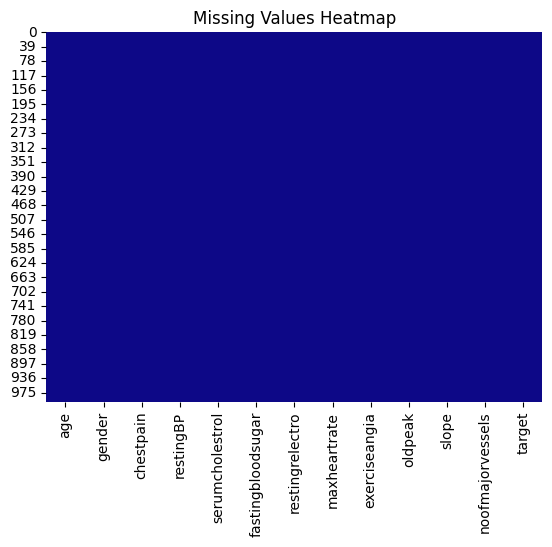

In [4]:
missing_values = data.isnull().sum()

print("\nChecking for missing values:")
print(missing_values)


sns.heatmap(data.isnull(), cbar=False, cmap='plasma')
plt.title("Missing Values Heatmap")

# Check for missing values and handle accordingly
if missing_values.sum() == 0:
    print("No missing values were found")
else:
    print("There are missing values in the dataset.")
plt.show()

Check for duplicate values

In [5]:
duplicate_rows = data.duplicated()

print("\nChecking for duplicate values:")
print(f"Total duplicate rows: {duplicate_rows.sum()}")


if duplicate_rows.sum() > 0:
    print("Duplicate rows found!")
    print(data[duplicate_rows])
else:
    print("No duplicate rows were found.")



Checking for duplicate values:
Total duplicate rows: 0
No duplicate rows were found.


Data Preparation

Feature Distribution

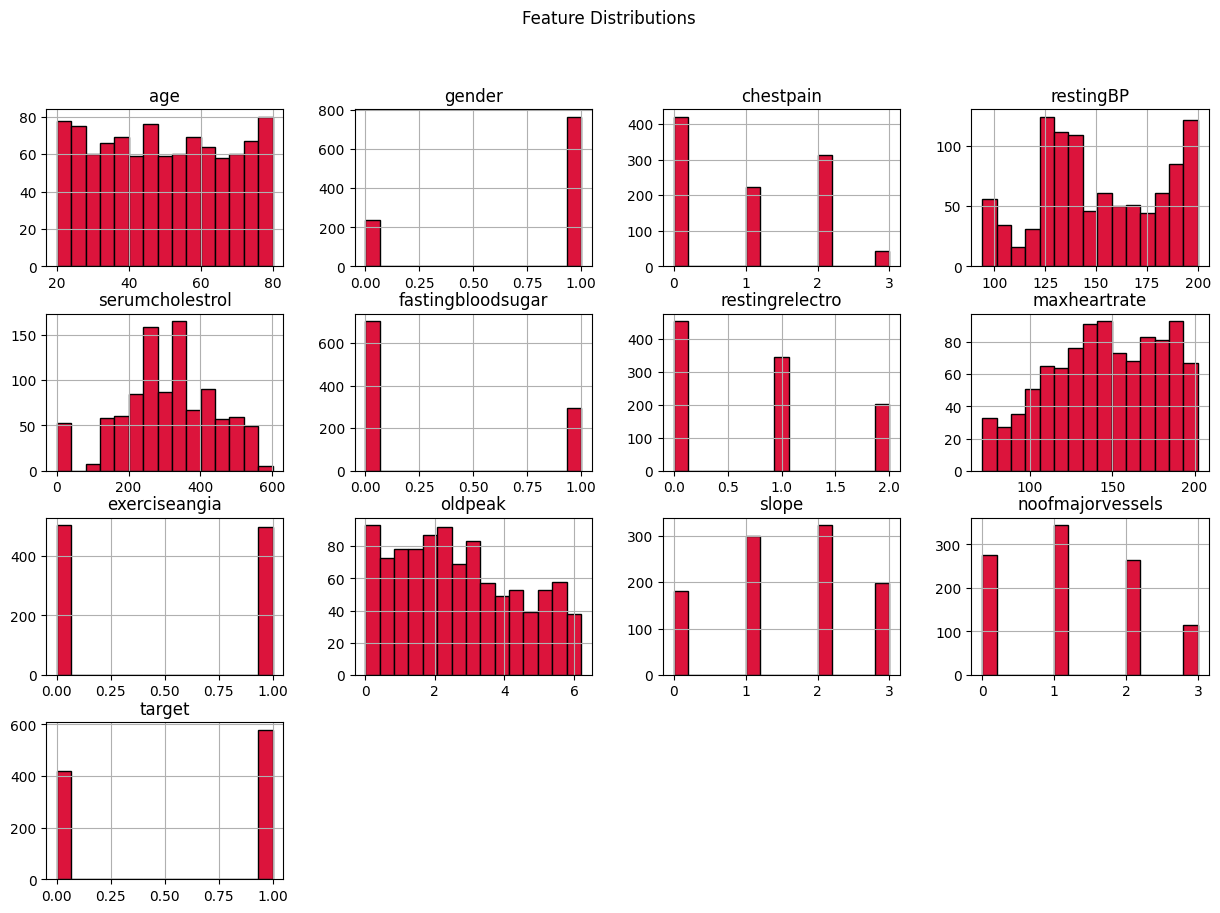

In [6]:
data.hist(bins=15, figsize=(15, 10), color='crimson', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

Correlation of All features

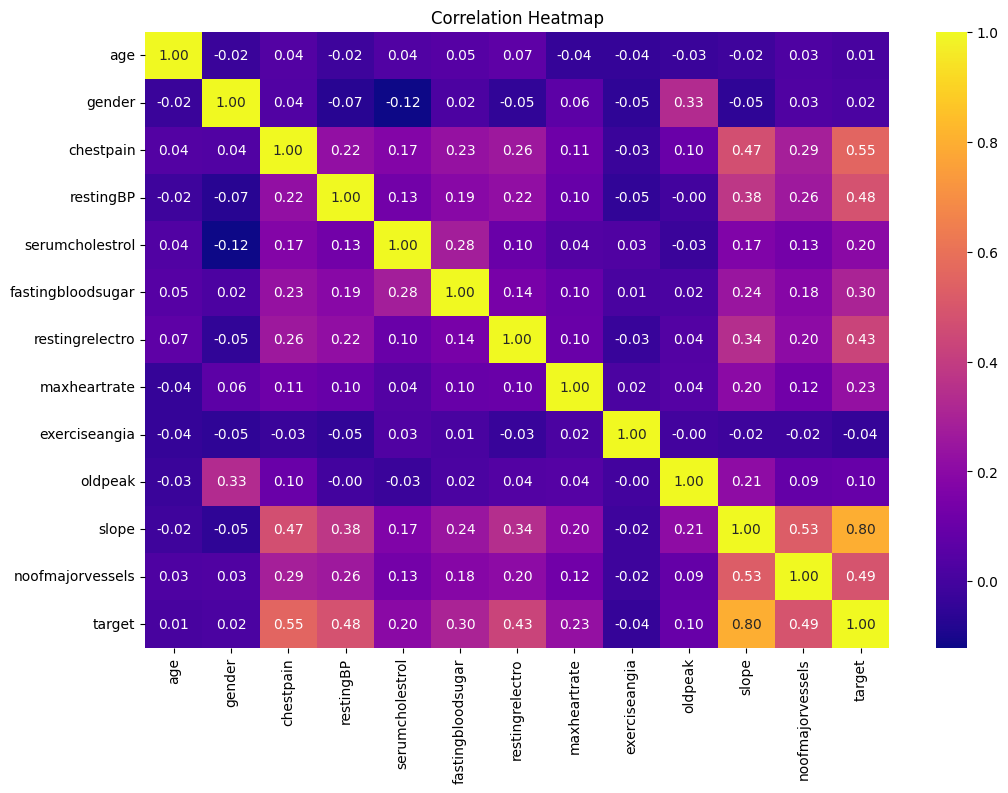

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="plasma", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Train test split

In [8]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

Logistic Regression


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



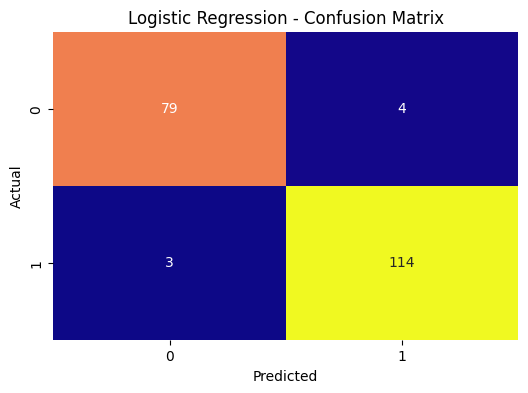

In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with scaled data
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print(f"Accuracy: {lr_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, lr_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap="plasma", cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Classifier

Decision Tree:
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.96      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



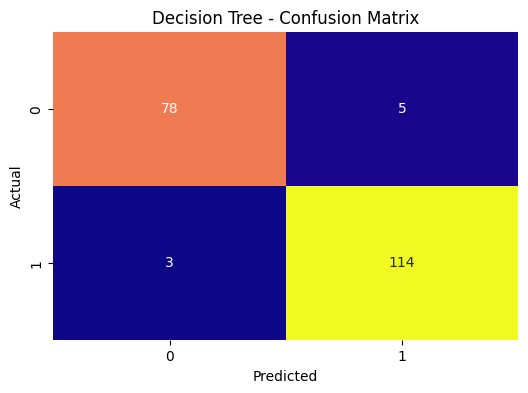

In [10]:
# Decision Tree Classifier
print("Decision Tree:")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print(f"Accuracy: {dt_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, dt_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap="plasma", cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest Classifier

Random Forest:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        83
           1       0.97      0.99      0.98       117

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



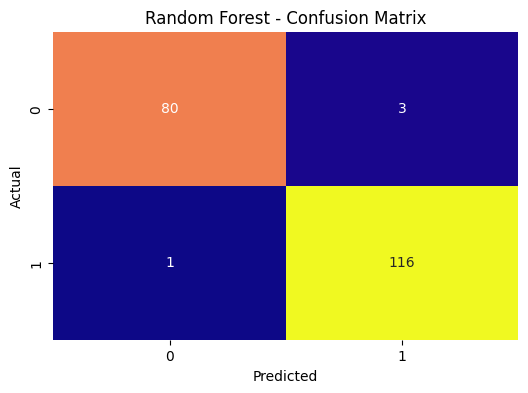

In [11]:
# Random Forest Classifier
print("Random Forest:")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, rf_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap="plasma", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Sample Data For Testing

In [12]:
feature_names = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar',
                 'restingrelectro', 'maxheartrate','exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']

# Normal Data (Healthy Individual)
normal_input = pd.DataFrame([[30, 0, 0, 120, 200, 0, 0, 160, 0, 1.0, 1, 0]],
                            columns=feature_names)

# High-Risk Data (Cardiovascular Disease)
high_risk_input = pd.DataFrame([[60, 1, 3, 180, 300, 1, 2, 140, 1, 3.0, 2, 3]],
                               columns=feature_names)

Prediction with healthy data and high risk data using lr_model(Linear Regression Model)

In [13]:
# Logistic Regression Prediction

# Scale the input data
normal_input_scaled = scaler.transform(normal_input)
high_risk_input_scaled = scaler.transform(high_risk_input)

# Normal Data (Healthy Individual)
normal_prediction_lr = lr_model.predict(normal_input_scaled)
print(f"Logistic Regression - Normal Data Prediction: {'Cardiovascular Disease' if normal_prediction_lr[0] == 1 else 'No Disease'}")

# High-Risk Data (Cardiovascular Disease)
high_risk_prediction_lr = lr_model.predict(high_risk_input_scaled)
print(f"Logistic Regression - High-Risk Data Prediction: {'Cardiovascular Disease' if high_risk_prediction_lr[0] == 1 else 'No Disease'}")


Logistic Regression - Normal Data Prediction: No Disease
Logistic Regression - High-Risk Data Prediction: Cardiovascular Disease


Prediction with healthy data and high risk data using dt_model(Decision Tree Model)

In [14]:
# Decision Tree Classifier Prediction

# Normal Data (Healthy Individual)
normal_prediction_dt = dt_model.predict(normal_input)
print(f"Decision Tree - Normal Data Prediction: {'Cardiovascular Disease' if normal_prediction_dt[0] == 1 else 'No Disease'}")

# High-Risk Data (Cardiovascular Disease)
high_risk_prediction_dt = dt_model.predict(high_risk_input)
print(f"Decision Tree - High-Risk Data Prediction: {'Cardiovascular Disease' if high_risk_prediction_dt[0] == 1 else 'No Disease'}")

Decision Tree - Normal Data Prediction: No Disease
Decision Tree - High-Risk Data Prediction: Cardiovascular Disease


Prediction with healthy data and high risk data using rf_model(Random Forest Model)

In [15]:
# Random Forest Prediction

# Normal Data (Healthy Individual)
normal_prediction = rf_model.predict(normal_input)
print(f"Normal Data Prediction: {'Cardiovascular Disease' if normal_prediction[0] == 1 else 'No Disease'}")

# High-Risk Data (Cardiovascular Disease)
high_risk_prediction = rf_model.predict(high_risk_input)
print(f"High-Risk Data Prediction: {'Cardiovascular Disease' if high_risk_prediction[0] == 1 else 'No Disease'}")



Normal Data Prediction: No Disease
High-Risk Data Prediction: Cardiovascular Disease


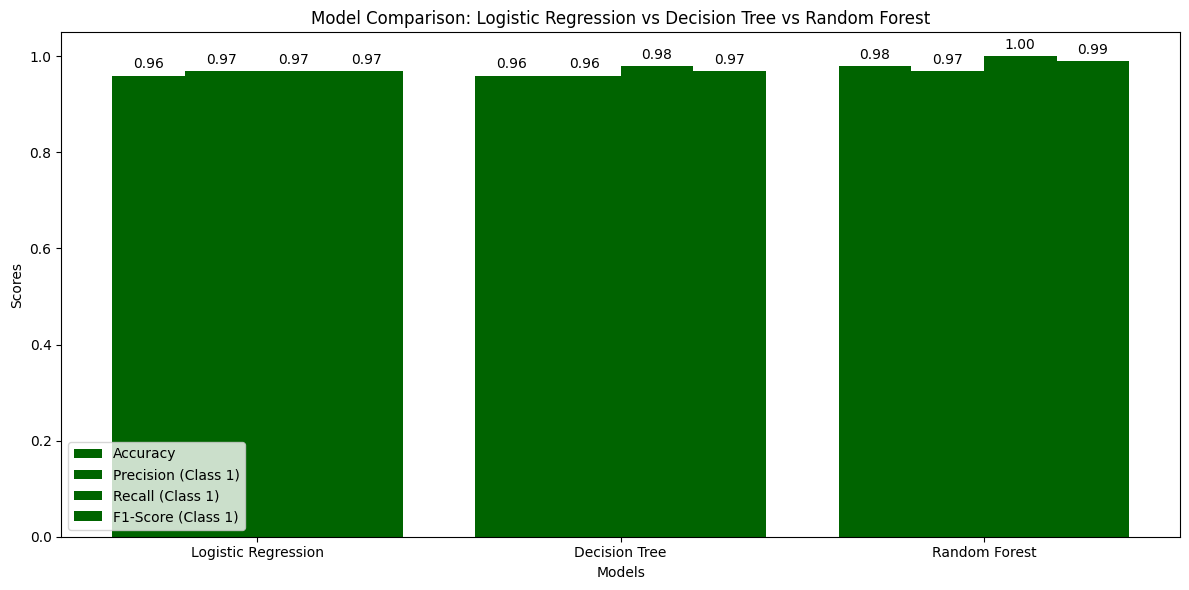

In [16]:
# Define model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Metrics for each model
accuracy = [0.96, 0.96, 0.98]
precision_class_0 = [0.96, 0.97, 1.00]
recall_class_0 = [0.95, 0.94, 0.96]
f1_class_0 = [0.96, 0.96, 0.98]

precision_class_1 = [0.97, 0.96, 0.97]
recall_class_1 = [0.97, 0.98, 1.00]
f1_class_1 = [0.97, 0.97, 0.99]


x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))


rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color='darkgreen')
rects2 = ax.bar(x - width/2, precision_class_1, width, label='Precision (Class 1)', color='darkgreen')
rects3 = ax.bar(x + width/2, recall_class_1, width, label='Recall (Class 1)', color='darkgreen')
rects4 = ax.bar(x + width*1.5, f1_class_1, width, label='F1-Score (Class 1)', color='darkgreen')


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Logistic Regression vs Decision Tree vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Add value annotations
def add_annotations(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_annotations(rects1)
add_annotations(rects2)
add_annotations(rects3)
add_annotations(rects4)

# Show plot
plt.tight_layout()
plt.show()


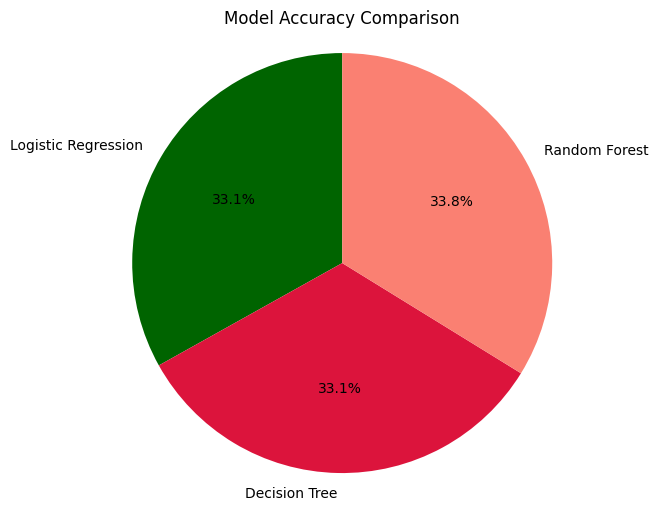

In [17]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.96, 0.96, 0.98]


plt.figure(figsize=(8, 6))
plt.pie(accuracy, labels=models, autopct='%1.1f%%', startangle=90, colors=['darkgreen', 'crimson', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.axis('equal')


plt.show()

In [20]:
# ==========================================
# CARDIOVASCULAR DISEASE PREDICTION - CUI
# Question -> Answer -> Prediction (ONLY)
# Based on your notebook: Cardiovascular_Disease_Dataset.csv:contentReference[oaicite:2]{index=2}
# Drops patientid like your notebook:contentReference[oaicite:3]{index=3}
# TARGET column = "target"
# ==========================================

import os
from pathlib import Path

import joblib
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


# -------- CONFIG --------
CSV_PATHS = [
    Path("Cardiovascular_Disease_Dataset.csv"),
    Path("/mnt/data/Cardiovascular_Disease_Dataset.csv"),
]
TARGET = "target"
DROP_COLS = ["patientid"]          # dropped in your notebook:contentReference[oaicite:4]{index=4}
MODEL_PATH = "cvd_best_model.joblib"
RANDOM_STATE = 42


def _parse_value(x: str):
    x = x.strip()
    if x == "":
        return None
    try:
        return int(x)
    except:
        try:
            return float(x)
        except:
            return x


def _find_csv():
    for p in CSV_PATHS:
        if p.exists():
            return p
    raise FileNotFoundError("Cardiovascular_Disease_Dataset.csv not found.")


def _drop_unnamed(df: pd.DataFrame) -> pd.DataFrame:
    return df.loc[:, ~df.columns.astype(str).str.lower().str.startswith("unnamed")]


def _train_and_save(csv_path: Path):
    df = pd.read_csv(csv_path)
    df = _drop_unnamed(df)

    # drop patientid if exists (same as notebook)
    for c in DROP_COLS:
        if c in df.columns:
            df = df.drop(columns=[c])

    if TARGET not in df.columns:
        raise ValueError(f"Target column '{TARGET}' not found in CSV. Available: {list(df.columns)}")

    X = df.drop(columns=[TARGET])
    y = df[TARGET].astype(int)

    # detect numeric/categorical
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = [c for c in X.columns if c not in num_cols]

    preprocess = ColumnTransformer(
        transformers=[
            ("num", Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]), num_cols),
            ("cat", Pipeline([
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("onehot", OneHotEncoder(handle_unknown="ignore")),
            ]), cat_cols),
        ],
        remainder="drop"
    )

    model = Pipeline([
        ("prep", preprocess),
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=RANDOM_STATE,
            n_jobs=-1
        ))
    ])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
    )

    model.fit(X_train, y_train)
    joblib.dump(model, MODEL_PATH)
    return model


def _load_or_train():
    if os.path.exists(MODEL_PATH):
        return joblib.load(MODEL_PATH)
    return _train_and_save(_find_csv())


# -------------- RUN CUI --------------
model = _load_or_train()

feature_cols = list(model.feature_names_in_)

answers = {}
for col in feature_cols:
    answers[col] = _parse_value(input(f"{col}: "))

X_new = pd.DataFrame([answers])
pred = int(model.predict(X_new)[0])

# ONLY FINAL OUTPUT
print("CVD Detected" if pred == 1 else "No CVD")

age: 55
gender: 1
chestpain: 45
restingBP: 34
serumcholestrol: 56
fastingbloodsugar: 76
restingrelectro: 55
maxheartrate: 3
exerciseangia: 87
oldpeak: 65
slope: 45
noofmajorvessels: 44
CVD Detected
